In [60]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
base_dir = '/content/drive/MyDrive/ptsem2'
!ls "/content/drive/MyDrive/ptsem2"

bahan  train  validation


In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [62]:
desert_dir = os.path.join(bahan_dir, 'desert/')
forest_dir = os.path.join(bahan_dir, 'forest/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar desert :', len(os.listdir(desert_dir)))
print('Jumlah gambar forest :', len(os.listdir(forest_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar desert : 50
Jumlah gambar forest : 50


In [ ]:
train_desert_dir = os.path.join(train_dir, 'desert/')
train_forest_dir = os.path.join(train_dir, 'forest/')

validation_derest = os.path.join(validation_dir, 'desert/')
validation_forest = os.path.join(validation_dir, 'forest/')

In [ ]:
import os
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  os.makedirs(train, exist_ok=True)
  os.makedirs(val, exist_ok=True)

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.9

source_00 = desert_dir
train_00 = train_desert_dir
val_00 = validation_desert
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 =forest_dir
train_01 = train_forest_dir
val_01 = validation_forest
train_val_split(source_01, train_01, val_01, train_ratio)


In [ ]:
print('Jumlah Semua desert :', len(os.listdir(desert_dir)))
print('Jumlah Train desert :', len(os.listdir(train_desert_dir)))
print('Jumlah Validation desert :', len(os.listdir(validation_desert)))

print('Jumlah Semua forest :', len(os.listdir(forest_dir)))
print('Jumlah Train forest :', len(os.listdir(train_forest_dir)))
print('Jumlah Validation forest :', len(os.listdir(validation_forest)))

Jumlah Semua desert : 50
Jumlah Train desert : 45
Jumlah Validation desert : 5
Jumlah Semua forest : 50
Jumlah Train forest : 45
Jumlah Validation forest : 5


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.1)

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

Found 90 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2, 2),
     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(200, activation='relu'),
     tf.keras.layers.Dropout(0.3, seed=112),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dropout(0.5, seed=112),
     tf.keras.layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch=6,
          epochs=25,
          validation_data=val_generator,
          validation_steps=1,
          verbose=1,
          callbacks=[callbacks]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 617ms/step - accuracy: 0.4490 - loss: 0.8255 - val_accuracy: 0.5000 - val_loss: 0.6584
Epoch 2/25
3/6 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.5278 - loss: 0.6695

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.5306 - loss: 0.6702 - val_accuracy: 0.5000 - val_loss: 0.6243
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step - accuracy: 0.6160 - loss: 0.6411 - val_accuracy: 0.9000 - val_loss: 0.4692
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.8583 - loss: 0.4944 - val_accuracy: 1.0000 - val_loss: 0.2931
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 575ms/step - accuracy: 0.8612 - loss: 0.3903 - val_accuracy: 0.8000 - val_loss: 0.4414
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.6222 - loss: 0.7121 - val_accuracy: 1.0000 - val_loss: 0.1772
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - accuracy: 0.9174 - loss: 0.3013 - val_accuracy: 0.9000 - val_loss: 0.2640
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.8750 - loss: 0.3260 - val_accuracy: 1.0000 - val_loss: 0.1328
Epoch 9/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 809ms/step - accuracy: 0.9840 - loss: 0.1718 - val_accuracy: 1.0000 - val_loss: 0.0199
Epo

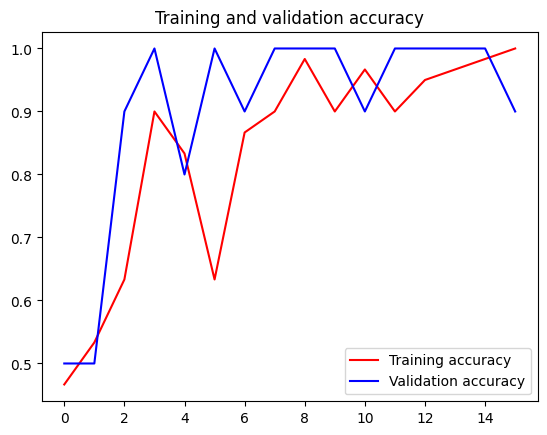

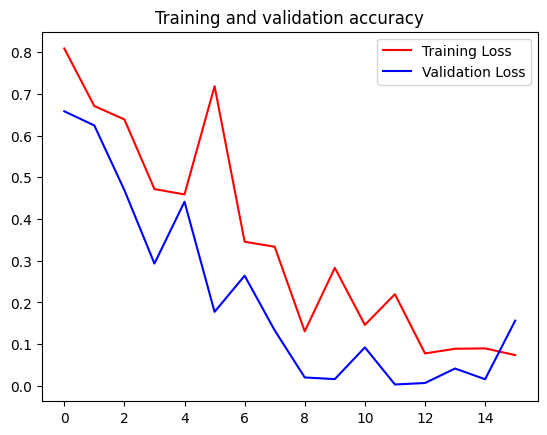

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')
plt.show()

*mencoba klasifikasi*

Saving desert.91.jpg to desert.91.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
desert.91.jpg
This image belongs to class desert


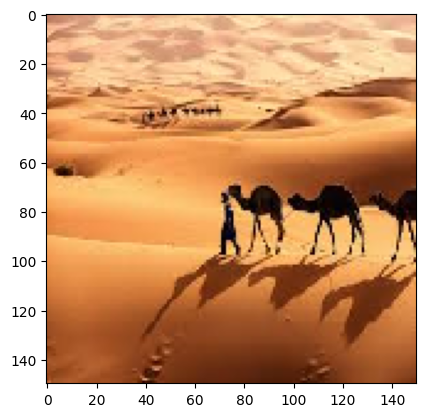

In [59]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1:
      print('This image belongs to class', class_list[j])
      break